In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load in all datasets
species_names = np.load("/data/cher/EcoBound/data/species.npy", allow_pickle=True)
coords_df = pd.read_csv('/data/cher/EcoBound/data/densely_sampled_pts.csv')

species_probs = np.load("/data/cher/EcoBound/outputs/species_priors/STL-loc-base.npy", allow_pickle=True)


In [6]:
prob_df = pd.DataFrame(species_probs, columns=[f"prob_{name}" for name in species_names])

results_df = pd.concat([coords_df, prob_df], axis=1)

In [ ]:
display(species_probs.shape)
display(results_df.head())
display(results_df.shape)

(260100, 5971)

,Unnamed: 0,lon,lat,prob_Bombus griseocollis,prob_Euchromius ocellea,prob_Nycticorax nycticorax,prob_Dryophytes versicolor,prob_Branta canadensis,prob_Accipiter cooperii,prob_Papilio glaucus,...,prob_Sphodros niger,prob_Lapsana communis,prob_Auplopus mellipes,prob_Neoprociphilus aceris,prob_Neomyia cornicina,prob_Leptolyngbya fragilis,prob_Loxostege cereralis,prob_Mycena leptocephala,prob_Euglandina rosea,prob_Acilius fraternus
0,0,-90.092140,38.885166,0.065134,1.162179e-09,0.194517,0.001321,0.814164,0.347812,0.012174,...,2.794242e-08,9.152594e-07,9.646059e-07,1.447934e-08,0.000001,0.000005,2.514867e-08,0.000001,0.000001,0.000001
1,1,-90.093300,38.885166,0.065038,1.159572e-09,0.195143,0.001321,0.814797,0.348443,0.012165,...,2.795639e-08,9.187260e-07,9.680415e-07,1.462629e-08,0.000001,0.000005,2.542319e-08,0.000001,0.000001,0.000001
2,2,-90.094450,38.885166,0.064881,1.155272e-09,0.196181,0.001320,0.815841,0.349488,0.012150,...,2.797965e-08,9.244686e-07,9.737460e-07,1.487264e-08,0.000001,0.000005,2.588385e-08,0.000001,0.000001,0.000001
3,3,-90.095604,38.885166,0.064661,1.149241e-09,0.197647,0.001320,0.817300,0.350960,0.012129,...,2.801211e-08,9.326135e-07,9.818043e-07,1.522585e-08,0.000001,0.000005,2.654538e-08,0.000001,0.000001,0.000001
4,4,-90.096760,38.885166,0.064356,1.140968e-09,0.199545,0.001319,0.819167,0.352854,0.012099,...,2.801254e-08,9.427381e-07,9.917183e-07,1.567736e-08,0.000001,0.000005,2.738326e-08,0.000001,0.000001,0.000001


(260100, 5974)

,lon,lat,prob_Sciurus carolinensis
0,-90.092140,38.885166,0.007095
1,-90.093300,38.885166,0.007087
2,-90.094450,38.885166,0.007074
3,-90.095604,38.885166,0.007056
4,-90.096760,38.885166,0.007032
...,...,...,...
260095,-90.675220,38.456852,0.006252
260096,-90.676370,38.456852,0.006248
260097,-90.677520,38.456852,0.006244
260098,-90.678680,38.456852,0.006242


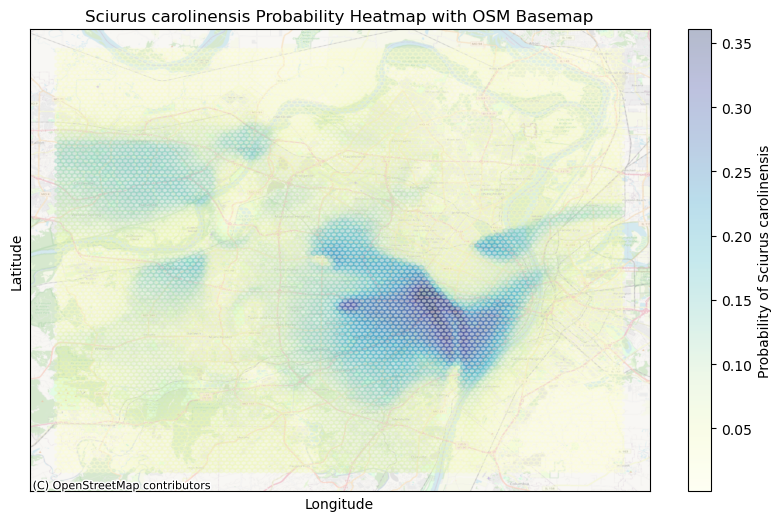

In [ ]:
# Convert lat/lon to Web Mercator (EPSG:3857)
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

df = results_df[['lon', 'lat', "prob_Sciurus carolinensis"]].copy()

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["lon"], df["lat"]), crs="EPSG:4326")
gdf = gdf.to_crs("EPSG:3857")  # Convert to Web Mercator

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create hexbin plot with transparency (alpha)
hb = ax.hexbin(gdf.geometry.x, gdf.geometry.y, C=df["prob_Sciurus carolinensis"], 
               gridsize=100, cmap="YlGnBu", reduce_C_function=np.mean, alpha=0.3)  # Adjust alpha for transparency

# Add colorbar
cb = plt.colorbar(hb, ax=ax, label="Probability of Sciurus carolinensis")

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12, alpha=0.5)  # Adjust alpha for transparency

# Labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Sciurus carolinensis Probability Heatmap with OSM Basemap")

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>